In [44]:
#imports
import numpy as np
import scipy.stats as s
import matplotlib.pyplot as plt

(array([  2.,   5.,   6.,   9.,  20.,  28.,  53.,  84., 103., 116., 163.,
        179., 178., 185., 205., 159., 137., 112.,  78.,  66.,  46.,  29.,
         18.,  10.,   6.,   2.,   0.,   0.,   0.,   1.]),
 array([0.03877895, 0.05856307, 0.07834718, 0.0981313 , 0.11791542,
        0.13769953, 0.15748365, 0.17726777, 0.19705189, 0.216836  ,
        0.23662012, 0.25640424, 0.27618835, 0.29597247, 0.31575659,
        0.33554071, 0.35532482, 0.37510894, 0.39489306, 0.41467717,
        0.43446129, 0.45424541, 0.47402953, 0.49381364, 0.51359776,
        0.53338188, 0.55316599, 0.57295011, 0.59273423, 0.61251835,
        0.63230246]),
 <BarContainer object of 30 artists>)

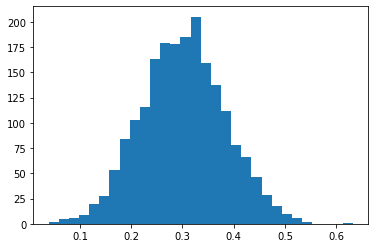

In [45]:
mean = 0.3
std = 0.08
# Create Distribution
Dist1 = s.norm(loc=mean, scale=std)
out=Dist1.rvs(2000)
plt.hist(out, bins=30)

(array([ 92., 156., 190., 220., 209., 191., 184., 180., 154., 110.,  74.,
         65.,  51.,  40.,  23.,  21.,  16.,   7.,   5.,   2.,   3.,   4.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00727704, 0.06221665, 0.11715627, 0.17209588, 0.22703549,
        0.28197511, 0.33691472, 0.39185433, 0.44679395, 0.50173356,
        0.55667317, 0.61161279, 0.6665524 , 0.72149201, 0.77643162,
        0.83137124, 0.88631085, 0.94125046, 0.99619008, 1.05112969,
        1.1060693 , 1.16100892, 1.21594853, 1.27088814, 1.32582776,
        1.38076737, 1.43570698, 1.49064659, 1.54558621, 1.60052582,
        1.65546543]),
 <BarContainer object of 30 artists>)

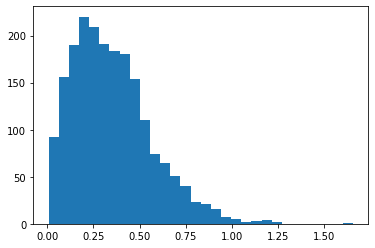

In [46]:
Dist2 = s.weibull_min(c=1.7, scale=0.4)
out=Dist2.rvs(2000)
plt.hist(out, bins=30)

(array([ 12.,  18.,  40.,  56.,  61.,  64.,  86.,  85., 106., 110.,  96.,
        116.,  95., 104.,  84.,  89.,  94.,  90.,  79.,  71.,  67.,  37.,
         54.,  48.,  47.,  34.,  26.,  21.,  33.,  16.,  15.,  12.,  10.,
          8.,   4.,   2.,   2.,   4.,   3.,   1.]),
 array([0.02183976, 0.03928557, 0.05673138, 0.07417719, 0.091623  ,
        0.10906881, 0.12651462, 0.14396043, 0.16140624, 0.17885205,
        0.19629786, 0.21374367, 0.23118948, 0.24863529, 0.2660811 ,
        0.28352691, 0.30097272, 0.31841853, 0.33586434, 0.35331014,
        0.37075595, 0.38820176, 0.40564757, 0.42309338, 0.44053919,
        0.457985  , 0.47543081, 0.49287662, 0.51032243, 0.52776824,
        0.54521405, 0.56265986, 0.58010567, 0.59755148, 0.61499729,
        0.6324431 , 0.64988891, 0.66733472, 0.68478053, 0.70222634,
        0.71967215]),
 <BarContainer object of 40 artists>)

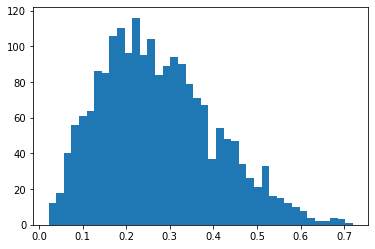

In [47]:
Dist3 = s.beta(3,8)
t=Dist3.rvs(2000)
plt.hist(t, bins=40)

In [73]:
# Import / create data points over time
# Each data point can be defined by mass flow, dryness (and enthalpy excluded for now)
data_points = [
    {'Well': 0, 'Month': 2, 'Dryness': 0.3, 'MassFlow': 200., 'SteamFlow': 60.},
    {'Well': 1, 'Month': 7, 'Dryness': 0.1, 'MassFlow': 300., 'SteamFlow': 30.},
    {'Well': 2, 'Month': 4, 'Dryness': 0.25, 'MassFlow': 100., 'SteamFlow': 25.}
]

#, {'Well': 2, 'Month': 5, 'Dryness': 0.17, 'MassFlow': 100., 'SteamFlow': 17.}

In [74]:
# Let total steam flow equal the following:

S_total = np.array([[100], [100], [100], [110], [120], [130], [150], [180], [200], [100]])

In [75]:
# Pretend there are x1, x2, x3. Use norm for x1, weibull for x2, remainder for x3

# def generateAllocations(n):
#     x = np.zeros([n,3])
#     for i in range(len(x)):
#         x[i,0] = Dist1.rvs(1)
#         x[i,1] = Dist2.rvs(1)
#         x[i,2] = 1 - x[i,0] - x[i,1]
#     return x

# new method where we use data points to determine approximate allocations

def generateInitialAllocations(n, nx, data_points):
    x = np.zeros([n,nx])
    
    # Take data from data points to get initial guess of allocations
    well_steamflow_sums = np.zeros(nx)
    well_amnt_tfts = np.zeros(nx)
    for dp in data_points:
        well = dp['Well']
        well_steamflow_sums[well] += dp['SteamFlow']
        well_amnt_tfts[well] += 1
    well_steamflow_means = np.divide(well_steamflow_sums, well_amnt_tfts)
    well_initial_allocations = well_steamflow_means / sum(well_steamflow_means)
    
    print("Sum of allocations is "+str(sum(well_initial_allocations)))
    return well_initial_allocations


# Expected Value of Beta dist = a/(a+b) , mode = (a-1)/(a+b-2) , if increase a and b, then decrease variance

# Generate distributions based on initial allocations
def generateBetaDists(nx, initial_allocs):
    
    dists = []
    # For each well, set up a beta distribution
    for i in range(nx):
        print(initial_allocs[i])
        dists.append(s.beta(initial_allocs[i]*10, 10-initial_allocs[i]*10))
    
    
    return dists
    


In [76]:
pass

In [77]:
def generateAllocations(n, nx, data_points):
    
    # Find initial allocations
    initial_allocs = generateInitialAllocations(n, nx, data_points)
    # Generate Distributions
    dists = generateBetaDists(nx, initial_allocs)
    
    # Generate actual allocations
    x = np.zeros([n,nx])
    for i in range(n):
        # For certain time, get alloc for all wells based on distributions, then scale
        tmp = np.zeros(nx)
        for j in range(nx):
            tmp[j] = dists[j].rvs(1)
        for j in range(nx):
            x[i,j] = tmp[j] / sum(tmp)

    # Artificially set allocations to 'optimal'
    for i in range(n):
        x[i,:] = initial_allocs
    
            
    return x, dists

In [78]:
# Use 3rd (beta) distribution for drynesses (all wells have same dist atm)

def generateDryness(n, data_points):
    # Treat dryness as constant for now
    d = np.zeros([n,nx])
    
    # Take data from data points to get mean dryness
    well_dryness_sums = np.zeros(nx)
    dryness_amnt_tfts = np.zeros(nx)
    for dp in data_points:
        well = dp['Well']
        well_dryness_sums[well] += dp['Dryness']
        dryness_amnt_tfts[well] += 1
    well_dryness_means = np.divide(well_dryness_sums, dryness_amnt_tfts)

    # Assign to dryness matrix
    for i in range(n):
        d[i,:] = well_dryness_means
    
    return d

In [79]:
def generateSteamFlow(x, S_total):
    # x is n rows * xn columns
    # S_total is n * 1
    S = np.copy(x)
    for i in range(len(x)):
        S[i] = S[i] * S_total[i]

    return S

In [80]:
# Get results for these priors

n=10
nx=3
# nx = number of wells

x, dists = generateAllocations(n, nx, data_points)
x
d = generateDryness(n, data_points)

S = generateSteamFlow(x, S_total)
M = np.divide(S,d)
d

Sum of allocations is 0.9999999999999999
0.5217391304347826
0.2608695652173913
0.21739130434782608


array([[0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25]])

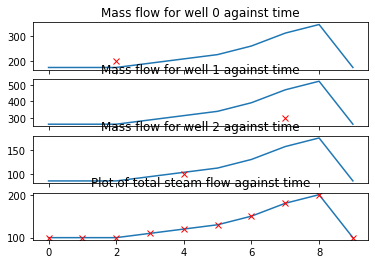

In [81]:
# plot x's against time
fig, axes = plt.subplots(nx+1, sharex=True)

for i in range(nx):
    # Plot the results
    axes[i].plot(range(n), M[:,i])
    axes[i].set_title("Mass flow for well "+str(i)+" against time")
    
    # Plot any data points
    for dp in data_points:
        if dp['Well'] == i:
            axes[i].plot(dp['Month'], dp['MassFlow'], 'rx')
    
# Plot total steam flow
axes[nx].plot(range(n), np.sum(S, axis=1))
axes[nx].set_title("Plot of total steam flow against time")
axes[nx].plot(range(n), S_total[:,0], 'rx')

#axes[nx+1].plot(range(n), np.sum(M, axis=1))
#axes[nx+1].set_title("Plot of total mass flow against time")

In [82]:
d

array([[0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25],
       [0.3 , 0.1 , 0.25]])